# Artificial Neural Networks with Keras

### Name  : Berrissoul Saad

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [57]:
# Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [58]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [59]:
import tensorflow as tf
from tensorflow import keras

In [60]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [61]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [62]:
X_train_full.shape

(60000, 28, 28)

In [63]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Each pixel intensity is represented as a byte (0 to 255):

In [64]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [65]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [66]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

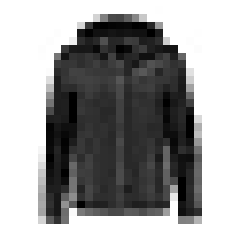

In [67]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [68]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [69]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [70]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [71]:
X_valid.shape

(5000, 28, 28)

In [72]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

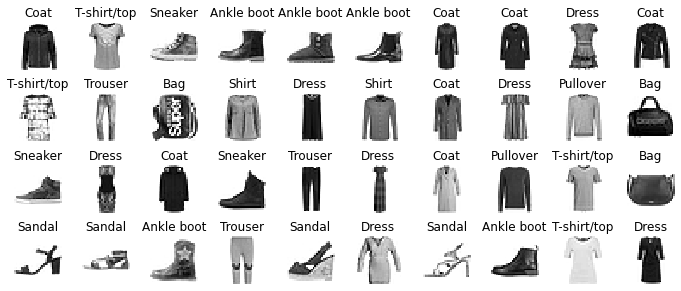

In [73]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [75]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [77]:
model.layers

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


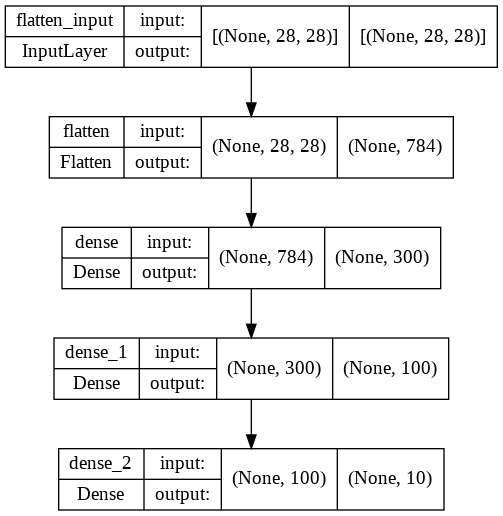

In [79]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [80]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [81]:
model.get_layer(hidden1.name) is hidden1

True

In [82]:
weights, biases = hidden1.get_weights()

In [83]:
weights

array([[-0.05636969, -0.01155593,  0.06422323, ...,  0.05260532,
         0.00981902,  0.05753748],
       [-0.04464866, -0.02347429, -0.01660091, ..., -0.03915835,
         0.04395614,  0.00504669],
       [ 0.02598906, -0.01008734,  0.05936411, ...,  0.06780376,
         0.06945521,  0.02979603],
       ...,
       [ 0.01136941,  0.01738805, -0.0589458 , ...,  0.07416072,
        -0.04810334,  0.06716344],
       [ 0.0303238 , -0.00321055,  0.02804229, ...,  0.0004228 ,
         0.06303202, -0.04253427],
       [-0.01797606,  0.0148626 , -0.07063724, ..., -0.04927886,
         0.00294635, -0.01645101]], dtype=float32)

In [84]:
weights.shape

(784, 300)

In [85]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [86]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [87]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [88]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7180 - accuracy: 0.7631 - val_loss: 0.5309 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8325 - val_loss: 0.4640 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4392 - accuracy: 0.8475 - val_loss: 0.4115 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4135 - accuracy: 0.8552 - val_loss: 0.4092 - val_accuracy: 0.8554
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3921 - accuracy: 0.8621 - val_loss: 0.4025 - val_accuracy: 0.8558
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8664 - val_loss: 0.3790 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3645 - accuracy: 0.8705 - val_loss: 0.3675 - val_accuracy:

In [89]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [90]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [91]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

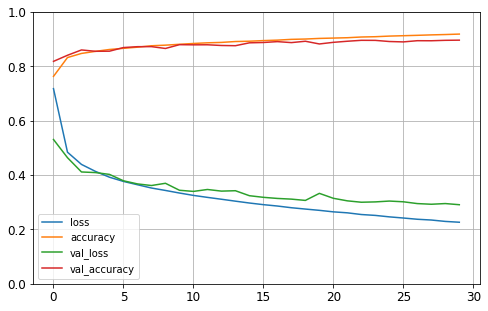

In [92]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [93]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.8839


[0.3251701295375824, 0.883899986743927]

In [94]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [95]:
#y_pred = model.predict_classes(X_new)
predict = model.predict(X_test) 
y_pred = np.argmax(predict,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [96]:
#np.array(class_names)[y_pred]

In [97]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

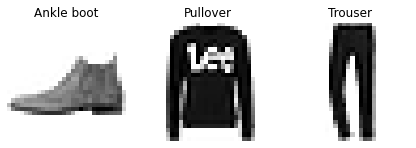

In [98]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

## Answer

#### 1) Plot Learning curves when using different optimizers

In [99]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

optimizers = ['sgd','rmsprop', 'adam']

historics = []

for opt in optimizers :
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer =  opt,
                metrics=["accuracy"])
  
  history = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))
  
  historics.append((history, opt))
  

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7356 - accuracy: 0.7578 - val_loss: 0.5182 - val_accuracy: 0.8212
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4916 - accuracy: 0.8288 - val_loss: 0.5054 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4452 - accuracy: 0.8433 - val_loss: 0.4233 - val_accuracy: 0.8568
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4187 - accuracy: 0.8520 - val_loss: 0.4101 - val_accuracy: 0.8614
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8599 - val_loss: 0.3845 - val_accuracy: 0.8668
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3810 - accuracy: 0.8652 - val_loss: 0.3950 - val_accuracy: 0.8610
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3675 - accuracy: 0.8716 - val_loss: 0.3828 - val_accuracy:

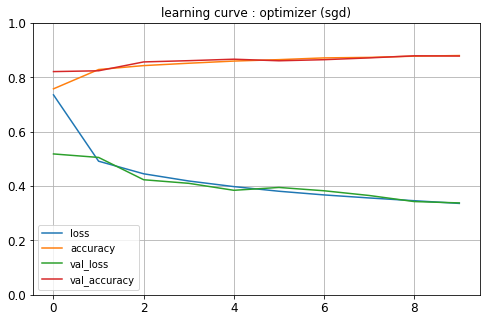

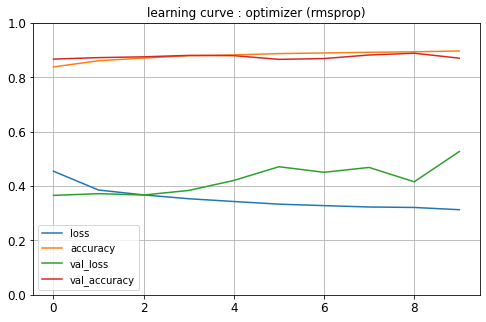

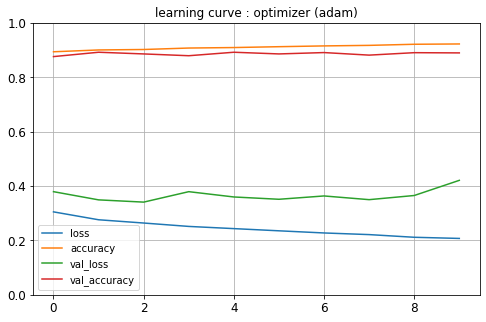

In [100]:
for index,hist in enumerate(historics):
  pd.DataFrame(hist[0].history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title('learning curve : optimizer ('+ hist[1] +')')
  plt.show()

#### 2) Plot Learning curves when using different batch size

In [101]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

sizes = [20,40, 60]

historics = []

for size in sizes :
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer =  'sgd',
                metrics=["accuracy"])
  
  history = model.fit(X_train, y_train, batch_size=size, epochs=10,
                    validation_data=(X_valid, y_valid))
  
  historics.append((history, str(size)))

Epoch 1/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.6437 - accuracy: 0.7861 - val_loss: 0.4593 - val_accuracy: 0.8478
Epoch 2/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.4539 - accuracy: 0.8399 - val_loss: 0.4302 - val_accuracy: 0.8486
Epoch 3/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.4107 - accuracy: 0.8550 - val_loss: 0.3963 - val_accuracy: 0.8614
Epoch 4/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.3824 - accuracy: 0.8647 - val_loss: 0.3723 - val_accuracy: 0.8694
Epoch 5/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.3616 - accuracy: 0.8709 - val_loss: 0.3692 - val_accuracy: 0.8662
Epoch 6/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.3468 - accuracy: 0.8752 - val_loss: 0.3688 - val_accuracy: 0.8692
Epoch 7/10
2750/2750 [==============================] - 7s 2ms/step - loss: 0.3328 - accuracy: 0.8804 - val_loss: 0.3393 - val_accuracy:

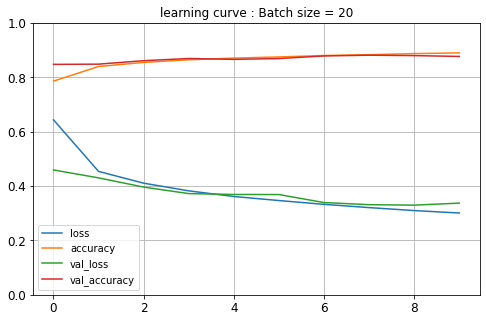

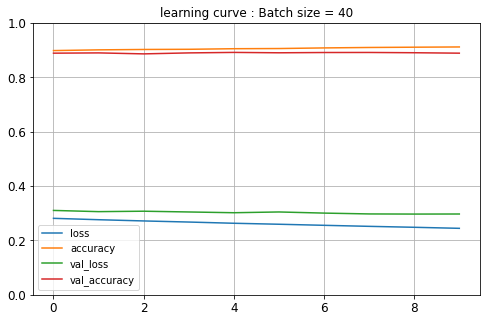

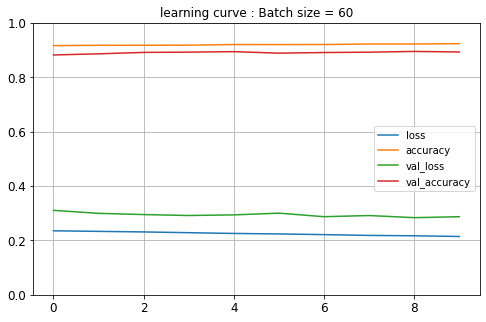

In [102]:
for index,hist in enumerate(historics):
  pd.DataFrame(hist[0].history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title('learning curve : Batch size = '+ hist[1])
  plt.show()

#### 3) Plot Learning curves when using different number of epochs

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

epochs = [5,10, 15]

historics = []

for epoch in epochs :
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer =  'sgd',
                metrics=["accuracy"])
  
  history = model.fit(X_train, y_train, batch_size=100, epochs=epoch,
                    validation_data=(X_valid, y_valid))
  
  historics.append((history, str(epoch)))

Epoch 1/5
550/550 [==============================] - 2s 3ms/step - loss: 0.9593 - accuracy: 0.7008 - val_loss: 0.6471 - val_accuracy: 0.7850
Epoch 2/5
550/550 [==============================] - 2s 3ms/step - loss: 0.5969 - accuracy: 0.8008 - val_loss: 0.5460 - val_accuracy: 0.8234
Epoch 3/5
550/550 [==============================] - 1s 3ms/step - loss: 0.5273 - accuracy: 0.8210 - val_loss: 0.5016 - val_accuracy: 0.8330
Epoch 4/5
550/550 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.8303 - val_loss: 0.4670 - val_accuracy: 0.8406
Epoch 5/5
550/550 [==============================] - 2s 3ms/step - loss: 0.4697 - accuracy: 0.8373 - val_loss: 0.4625 - val_accuracy: 0.8432
Epoch 1/10
550/550 [==============================] - 2s 3ms/step - loss: 0.4540 - accuracy: 0.8417 - val_loss: 0.4475 - val_accuracy: 0.8482
Epoch 2/10
550/550 [==============================] - 2s 3ms/step - loss: 0.4412 - accuracy: 0.8463 - val_loss: 0.4292 - val_accuracy: 0.8524
Epoch 3/10


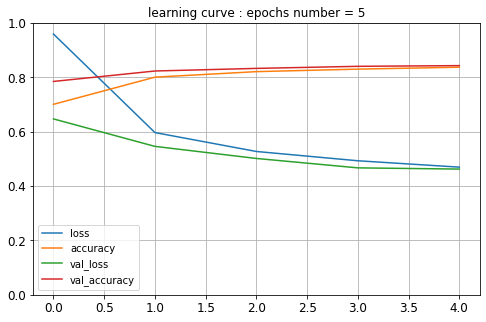

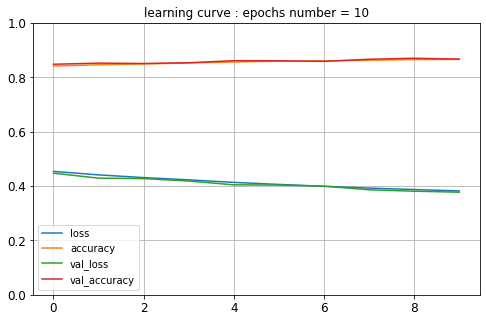

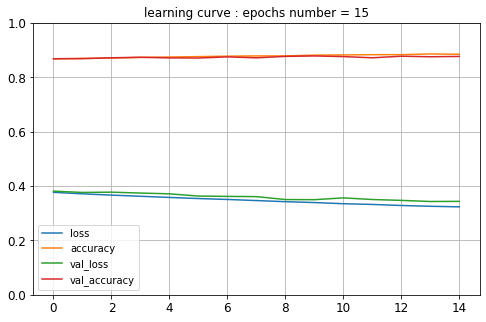

In [104]:
for index,hist in enumerate(historics):
  pd.DataFrame(hist[0].history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title('learning curve : epochs number = '+ hist[1])
  plt.show()

#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

We add additional neurons neurons and new Dropout layer between the first and the secaond hidden layers. The dropout rate is set to 20%, meaning one in 5 inputs will be randomly excluded from each update cycle.

In [111]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer =  "sgd",
              metrics=["accuracy"])
  
history = model.fit(X_train, y_train, batch_size=80, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
688/688 [==============================] - 3s 3ms/step - loss: 0.9528 - accuracy: 0.6905 - val_loss: 0.6279 - val_accuracy: 0.7844
Epoch 2/10
688/688 [==============================] - 2s 3ms/step - loss: 0.6171 - accuracy: 0.7909 - val_loss: 0.5278 - val_accuracy: 0.8252
Epoch 3/10
688/688 [==============================] - 2s 3ms/step - loss: 0.5490 - accuracy: 0.8119 - val_loss: 0.4786 - val_accuracy: 0.8378
Epoch 4/10
688/688 [==============================] - 2s 3ms/step - loss: 0.5096 - accuracy: 0.8232 - val_loss: 0.4586 - val_accuracy: 0.8416
Epoch 5/10
688/688 [==============================] - 2s 3ms/step - loss: 0.4823 - accuracy: 0.8328 - val_loss: 0.4347 - val_accuracy: 0.8530
Epoch 6/10
688/688 [==============================] - 2s 3ms/step - loss: 0.4620 - accuracy: 0.8380 - val_loss: 0.4182 - val_accuracy: 0.8554
Epoch 7/10
688/688 [==============================] - 2s 3ms/step - loss: 0.4465 - accuracy: 0.8424 - val_loss: 0.4102 - val_accuracy: 0.8598
Epoch 

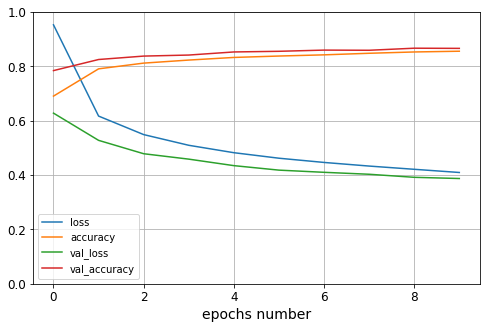

In [112]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('epochs number')
plt.show()

#### 5) Use Batch Normalisation

We add batch normalization after the activation function between Dense hidden layers.

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer =  "sgd",
              metrics=["accuracy"])
  
history = model.fit(X_train, y_train, batch_size=50, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1100/1100 [==============================] - 4s 3ms/step - loss: 0.5552 - accuracy: 0.8089 - val_loss: 0.4120 - val_accuracy: 0.8592
Epoch 2/5
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3968 - accuracy: 0.8580 - val_loss: 0.3828 - val_accuracy: 0.8596
Epoch 3/5
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3558 - accuracy: 0.8719 - val_loss: 0.3501 - val_accuracy: 0.8766
Epoch 4/5
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3312 - accuracy: 0.8804 - val_loss: 0.3401 - val_accuracy: 0.8780
Epoch 5/5
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3111 - accuracy: 0.8869 - val_loss: 0.3274 - val_accuracy: 0.8812


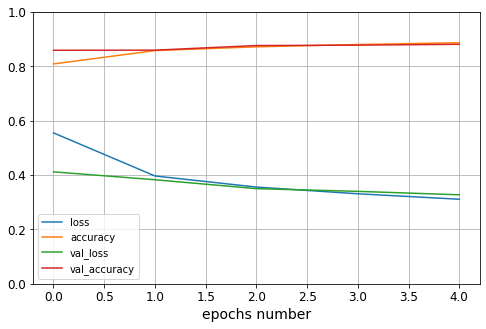

In [108]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('epochs number')
plt.show()

#### 6) repeat with more layers

We add two additional layers.

In [109]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer =  "sgd",
              metrics=["accuracy"])
  
history = model.fit(X_train, y_train, batch_size=50, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1100/1100 [==============================] - 4s 3ms/step - loss: 0.9072 - accuracy: 0.6845 - val_loss: 0.5309 - val_accuracy: 0.8190
Epoch 2/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.5385 - accuracy: 0.8087 - val_loss: 0.4490 - val_accuracy: 0.8474
Epoch 3/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4764 - accuracy: 0.8322 - val_loss: 0.4092 - val_accuracy: 0.8582
Epoch 4/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4364 - accuracy: 0.8435 - val_loss: 0.3871 - val_accuracy: 0.8658
Epoch 5/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4089 - accuracy: 0.8536 - val_loss: 0.3716 - val_accuracy: 0.8702
Epoch 6/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3881 - accuracy: 0.8604 - val_loss: 0.3541 - val_accuracy: 0.8750
Epoch 7/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3701 - accuracy: 0.8667 - val_loss: 0.3471 - val_accuracy:

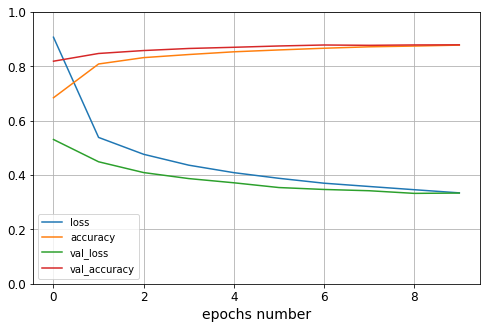

In [110]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('epochs number')
plt.show()